# MID PROJECT

In [218]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings("ignore")

sns.set(rc={"figure.figsize":(13,5)}, font_scale=1.3)

In [219]:
## first step is to read the data
df = pd.read_csv('Salaries.csv')
df.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  
4  2011    NaN  San Francisco    NaN

In [220]:
## check the info of the data to see the object and numeric data tybes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [221]:
## check the describe functin see the numeric data tybes analysis
df.describe()

Id       TotalPay  TotalPayBenefits           Year  Notes
count  148654.000000  148654.000000     148654.000000  148654.000000    0.0
mean    74327.500000   74768.321972      93692.554811    2012.522643    NaN
std     42912.857795   50517.005274      62793.533483       1.117538    NaN
min         1.000000    -618.130000       -618.130000    2011.000000    NaN
25%     37164.250000   36168.995000      44065.650000    2012.000000    NaN
50%     74327.500000   71426.610000      92404.090000    2013.000000    NaN
75%    111490.750000  105839.135000     132876.450000    2014.000000    NaN
max    148654.000000  567595.430000     567595.430000    2014.000000    NaN

In [222]:
## this step to see the percentage of nulls in the data
df.isnull().mean() * 100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

In [223]:
## check for duplicates in data and drop is found
df.duplicated().sum()

0

In [224]:
## check column names
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [225]:
## drop the columns with too many nulls 
df.drop(columns=['Id','Notes','Status'], inplace=True)

In [226]:
## show the data after dropping the columns
df.head(10)

EmployeeName                                        JobTitle  \
0      NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1        GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2      ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4     PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
5      DAVID SULLIVAN                       ASSISTANT DEPUTY CHIEF II   
6           ALSON LEE              BATTALION CHIEF, (FIRE DEPARTMENT)   
7       DAVID KUSHNER                  DEPUTY DIRECTOR OF INVESTMENTS   
8      MICHAEL MORRIS              BATTALION CHIEF, (FIRE DEPARTMENT)   
9  JOANNE HAYES-WHITE          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   
3    77916.0    56120.71   198306.9      NaN  332343.61         332343.61   
4   134401.6      9737.0  182234.59      NaN  326373.19         326373.19   
5   118602.0      8601.0  189082.74      NaN  316285.74         316285.74   
6   92492.01     89062.9  134426.14      NaN  315981.05         315981.05   
7  256576.96         0.0    51322.5      NaN  307899.46         307899.46   
8  176932.64    86362.68   40132.23      NaN  303427.55         303427.55   
9   285262.0         0.0   17115.73      NaN  302377.73         302377.73   

   Year         Agency  
0  2011  San Francisco  
1  2011  San Francisco  
2  2011  San Francisco  
3  2011  San Francisco  
4  2011  San Francisco  
5  2011  San Francisco  
6  2011  San Francisco  
7  2011  San Francisco  
8  2011  San Francisco  
9  2011  San Francisco

In [227]:
## check for duplicates again
df.duplicated().sum()

3

In [228]:
## drop the duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [229]:
## convert the columns to it's needed type, also use error = coerce to change all non numeric values to nulls
df['BasePay'] = pd.to_numeric(df['BasePay'],errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'],errors='coerce')

In [230]:
## check the data info after the dtype change 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148651 entries, 0 to 148650
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148651 non-null  object 
 1   JobTitle          148651 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148651 non-null  float64
 7   TotalPayBenefits  148651 non-null  float64
 8   Year              148651 non-null  int64  
 9   Agency            148651 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB


In [231]:
df.describe()

BasePay    OvertimePay       OtherPay       Benefits  \
count  148045.000000  148650.000000  148650.000000  112491.000000   
mean    66325.448840    5066.059886    3648.767297   25007.893151   
std     42764.635495   11454.380559    8056.601866   15402.215858   
min      -166.010000      -0.010000   -7058.590000     -33.890000   
25%     33588.200000       0.000000       0.000000   11535.395000   
50%     65007.450000       0.000000     811.270000   28628.620000   
75%     94691.050000    4658.175000    4236.065000   35566.855000   
max    319275.010000  245131.880000  400184.250000   96570.660000   

            TotalPay  TotalPayBenefits           Year  
count  148651.000000     148651.000000  148651.000000  
mean    74769.830909      93694.445667    2012.522613  
std     50516.398338      62792.756431       1.117529  
min      -618.130000       -618.130000    2011.000000  
25%     36169.340000      44071.405000    2012.000000  
50%     71427.220000      92406.010000    2013.000000  
75%    105841.940000     132877.495000    2014.000000  
max    567595.430000     567595.430000    2014.000000

# UNI & BI Variate

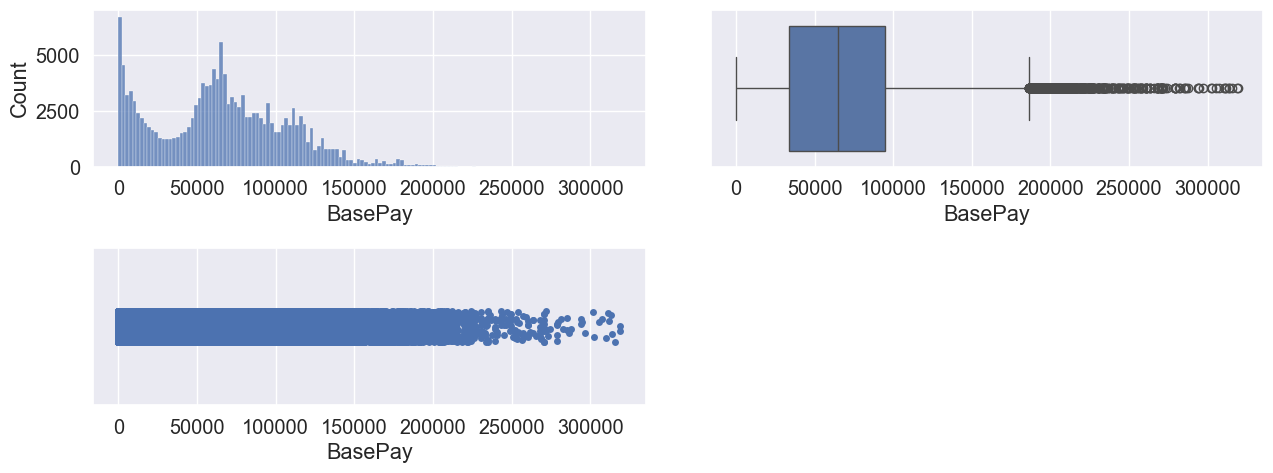

In [232]:
## univariate for basepay
plt.subplot(2,2,1)
sns.histplot(x=df['BasePay'])
plt.subplot(2,2,2)
sns.boxplot(x=df['BasePay'])
plt.subplot(2,2,3)
sns.stripplot(x=df['BasePay'])
plt.tight_layout(w_pad=3)
plt.show()
## noticed that it is right skewed

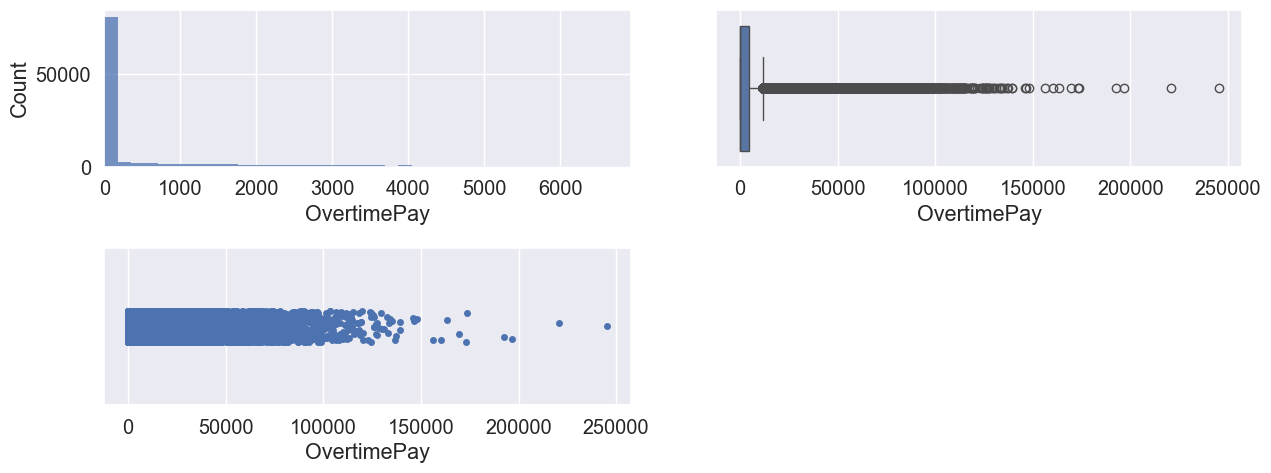

In [233]:
## univariate for OvertimePay
plt.subplot(2,2,1)
sns.histplot(x=df['OvertimePay'])
plt.xlim(0, df['OvertimePay'].quantile(0.8))
plt.subplot(2,2,2)
sns.boxplot(x=df['OvertimePay'])
plt.subplot(2,2,3)
sns.stripplot(x=df['OvertimePay'])
plt.tight_layout(w_pad=3)
plt.show()
## noticed that it is right skewed and it has a lot of outliers

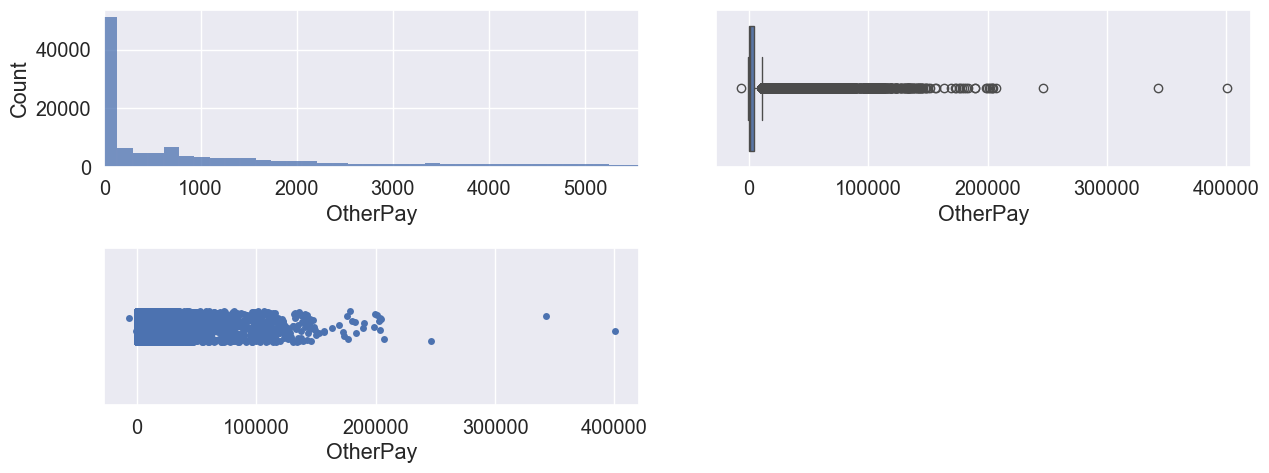

In [234]:
## univariate for OtherPay
plt.subplot(2,2,1)
sns.histplot(x=df['OtherPay'])
plt.xlim(0, df['OtherPay'].quantile(0.8))
plt.subplot(2,2,2)
sns.boxplot(x=df['OtherPay'])
plt.subplot(2,2,3)
sns.stripplot(x=df['OtherPay'])
plt.tight_layout(w_pad=3)
plt.show()

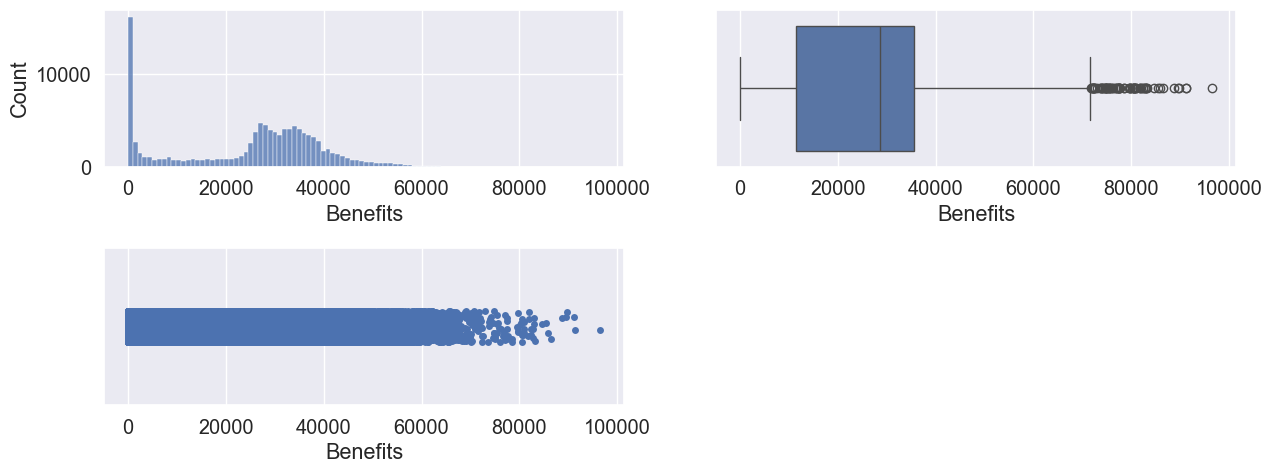

In [235]:
## univariate for Benefits
plt.subplot(2,2,1)
sns.histplot(x=df['Benefits'])
plt.subplot(2,2,2)
sns.boxplot(x=df['Benefits'])
plt.subplot(2,2,3)
sns.stripplot(x=df['Benefits'])
plt.tight_layout(w_pad=3)
plt.show()

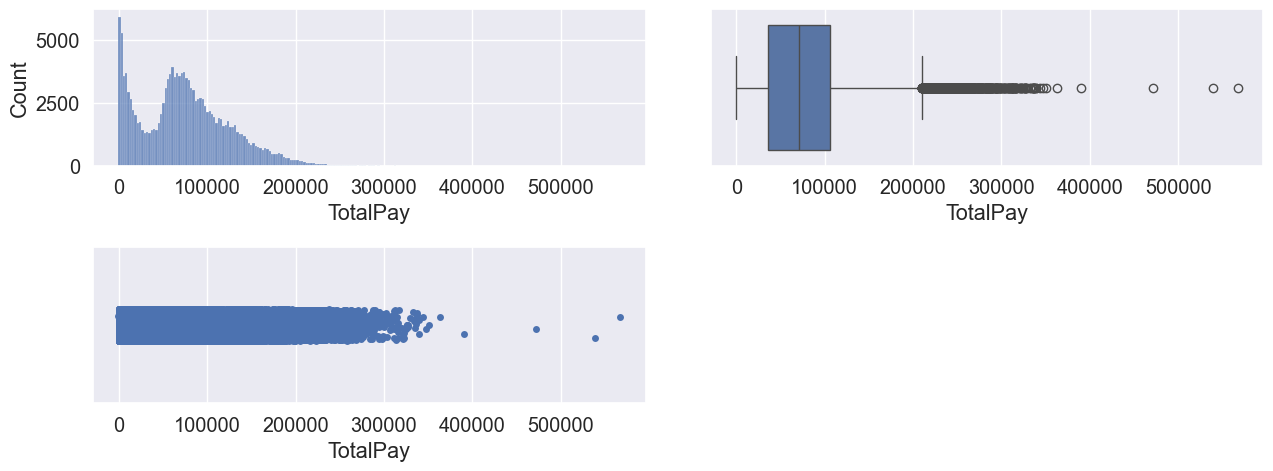

In [236]:
## univariate for TotalPay
plt.subplot(2,2,1)
sns.histplot(x=df['TotalPay'])
plt.subplot(2,2,2)
sns.boxplot(x=df['TotalPay'])
plt.subplot(2,2,3)
sns.stripplot(x=df['TotalPay'])
plt.tight_layout(w_pad=3)
plt.show()

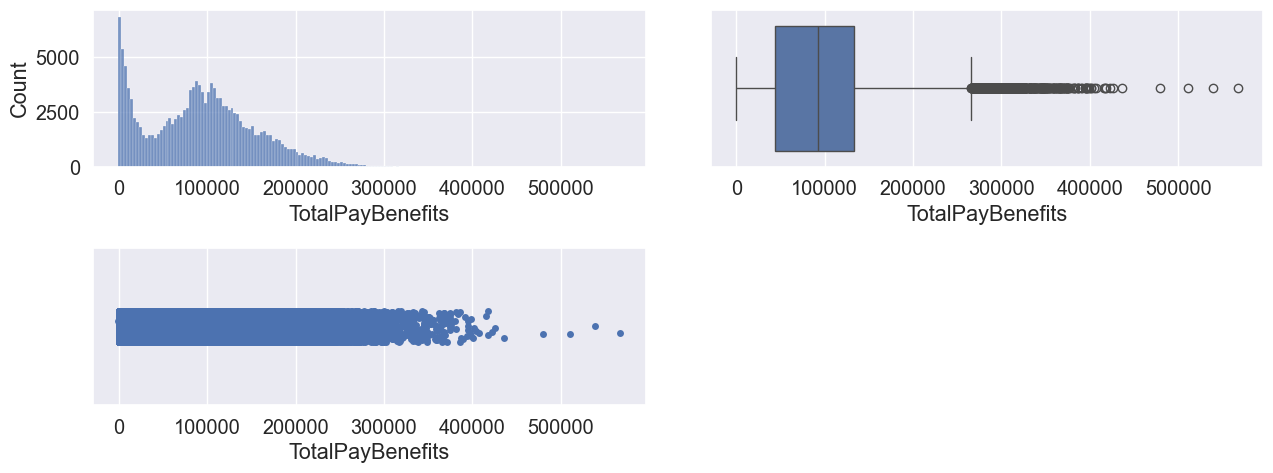

In [237]:
## univariate for TotalPayBenefits
plt.subplot(2,2,1)
sns.histplot(x=df['TotalPayBenefits'])
plt.subplot(2,2,2)
sns.boxplot(x=df['TotalPayBenefits'])
plt.subplot(2,2,3)
sns.stripplot(x=df['TotalPayBenefits'])
plt.tight_layout(w_pad=3)
plt.show()

# PRE PROCESSING

In [238]:
## checking the null values again
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [239]:
## to check basepay overview
df['BasePay'].value_counts()

0.00        1298
54703.00     338
55026.00     297
48472.40     210
65448.00     153
            ... 
65402.73       1
68818.72       1
73810.54       1
56242.68       1
15.50          1
Name: BasePay, Length: 109489, dtype: int64

In [240]:
## check the negative values
df[df['BasePay'] < 0]

EmployeeName      JobTitle  BasePay  OvertimePay  OtherPay  \
72832          Irwin Sidharta  Junior Clerk  -166.01       249.02       0.0   
72865            Robert Scott  Junior Clerk  -121.63       182.70       0.0   
72872         Chung Huey Kung  Junior Clerk  -109.22       163.83       0.0   
72874               Jordan Li  Junior Clerk  -106.60       159.90       0.0   
72878         Richard Jackson  Junior Clerk  -101.88       153.08       0.0   
72884  DiMarco McGhee-Stewart  Junior Clerk   -93.14       139.97       0.0   
72888      Leopoldo Marasigan  Junior Clerk   -87.38       131.06       0.0   
72894          Douglas Avalos  Junior Clerk   -75.67       113.76       0.0   
72908         Norma Rodriguez  Junior Clerk   -59.59        89.65       0.0   
72920        Charles Williams  Junior Clerk   -30.58        45.87       0.0   
72922             John Draper         Clerk    -9.50        14.25       0.0   

       Benefits  TotalPay  TotalPayBenefits  Year         Agency  
72832      6.56     83.01             89.57  2012  San Francisco  
72865      5.44     61.07             66.51  2012  San Francisco  
72872      4.32     54.61             58.93  2012  San Francisco  
72874      4.66     53.30             57.96  2012  San Francisco  
72878      4.55     51.20             55.75  2012  San Francisco  
72884      4.17     46.83             51.00  2012  San Francisco  
72888      3.89     43.68             47.57  2012  San Francisco  
72894      3.39     38.09             41.48  2012  San Francisco  
72908      2.68     30.06             32.74  2012  San Francisco  
72920      1.36     15.29             16.65  2012  San Francisco  
72922      0.42      4.75              5.17  2012  San Francisco

In [241]:
## check for nulls in basepay
df['BasePay'].isnull().sum()

606

In [242]:
## get the median of the basepay and fill the nulls and zeros with it
median_basepay = df['BasePay'].median()
median_basepay

65007.45

In [243]:
## first the negative values are less than 10 and the values are very low it dosen't make sense
df.drop(df[df['BasePay'] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [244]:
## then fill the nulls and zeros with the median
df['BasePay'].fillna(median_basepay, inplace=True)
df['BasePay'] = df['BasePay'].replace(0,median_basepay)

In [245]:
## check for nulls and zeros again to make sure it's cleaned
df['BasePay'].isnull().sum()

0

In [246]:
df[df['BasePay'] == 0]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []

In [247]:
## now repeat the same steps for the OvertimePay column
df['OvertimePay'].isnull().sum()

1

In [248]:
## in here we don't remove the zeros as it makes sense to have them (some people don't work overtime)
df['OvertimePay'].value_counts()

0.00        77321
10.68          41
681.23         41
152.13         38
1314.78        27
            ...  
9148.84         1
20094.67        1
25339.38        1
7272.73         1
56.77           1
Name: OvertimePay, Length: 65989, dtype: int64

In [249]:
df[df['OvertimePay'] < 0]

EmployeeName                   JobTitle   BasePay  OvertimePay  \
90703  Claudia M Sanchez  Senior Eligibility Worker  75033.03        -0.01   

       OtherPay  Benefits  TotalPay  TotalPayBenefits  Year         Agency  
90703    1540.0  28864.64  76573.02         105437.66  2013  San Francisco

In [250]:
df.dropna(subset=['OvertimePay'],inplace=True)
df.reset_index(drop=True, inplace=True)

In [251]:
df.drop(df[df['OvertimePay'] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [252]:
df['OvertimePay'].isnull().sum()

0

In [253]:
## make sure it's cleaned
df[df['OvertimePay'] < 0]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []

In [254]:
## repeat for the otherpay column
df['OtherPay'].isnull().sum()

0

In [255]:
## also in this column it's normal to have 0 value so we won't be filling it
df['OtherPay'].value_counts()

 0.00       41589
 624.00      2092
 250.00       907
 648.00       739
 3486.00      516
            ...  
 1753.26        1
 3271.00        1
 9120.78        1
 8048.70        1
-618.13         1
Name: OtherPay, Length: 83225, dtype: int64

In [256]:
df[df['OtherPay'] < 0]

EmployeeName                       JobTitle    BasePay  \
84958          Pei  Meng  IS Business Analyst-Principal  101274.51   
93188       Jose A Lemus           Custodial Supervisor   66744.00   
96156   John G Alexander                       Gardener   59733.32   
107172  Amelie E Bullard                  Special Nurse    6932.50   
148637         Joe Lopez     Counselor, Log Cabin Ranch   65007.45   

        OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  Year  \
84958          0.00  -7058.59  34583.40  94215.92         128799.32  2013   
93188       2234.40     -9.60  26889.04  68968.80          95857.84  2013   
96156         46.76    -46.76  25863.91  59733.32          85597.23  2013   
107172         0.00    -50.19    418.03   6882.31           7300.34  2013   
148637         0.00   -618.13      0.00   -618.13           -618.13  2014   

               Agency  
84958   San Francisco  
93188   San Francisco  
96156   San Francisco  
107172  San Francisco  
148637  San Francisco

In [257]:
df.drop(df[df['OtherPay'] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [258]:
df[df['OtherPay'] < 0]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []

In [259]:
## repeat for the Benefits column
df['Benefits'].isnull().sum()

36159

In [260]:
df['Benefits'].value_counts()

0.00        1733
7959.18      348
4659.36      107
25699.20      83
37055.22      82
            ... 
669.66         1
753.70         1
1073.31        1
662.98         1
1.24           1
Name: Benefits, Length: 98458, dtype: int64

In [261]:
## this step to check if the nulls are in different years or the same one
df.groupby(['Year'])['Benefits'].mean().sort_values()

Year
2013    23829.143761
2014    24790.252095
2012    26447.878767
2011             NaN
Name: Benefits, dtype: float64

In [262]:
## all the nulls were in one year so i assumed we don't have any benefits this year 
df['Benefits'] = df['Benefits'].fillna(0)

In [263]:
df[df['Benefits'] < 0]

EmployeeName          JobTitle   BasePay  OvertimePay  OtherPay  \
110512    Timothy E Gibson  Police Officer 3  65007.45          0.0      0.00   
110513      Mark E Laherty  Police Officer 3  65007.45          0.0      0.00   
110514       David P Kucia  Police Officer 3  65007.45          0.0      0.00   
144083  Leticia Villacampa       Secretary 2  65007.45          0.0   9991.77   

        Benefits  TotalPay  TotalPayBenefits  Year         Agency  
110512     -2.73      0.00             -2.73  2013  San Francisco  
110513     -8.20      0.00             -8.20  2013  San Francisco  
110514    -33.89      0.00            -33.89  2013  San Francisco  
144083    -13.80   9991.77           9977.97  2014  San Francisco

In [264]:
df.drop(df[df['Benefits'] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [265]:
df['Benefits'].isnull().sum()

0

In [266]:
df[df['Benefits'] < 0]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []

In [267]:
## repeat for Totalpay column
df['TotalPay'].isnull().sum()

0

In [268]:
df['TotalPay'].value_counts()

0.00         361
18594.00      82
123290.70     56
132242.50     49
105489.00     42
            ... 
81535.79       1
83027.70       1
85152.20       1
83764.86       1
6.00           1
Name: TotalPay, Length: 138468, dtype: int64

In [269]:
df[df['TotalPay'] < 0]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []

In [270]:
df['TotalPayBenefits'].isnull().sum()

0

In [271]:
df['TotalPayBenefits'].value_counts()

7959.18      263
123290.70     56
132242.50     49
26058.70      43
105489.00     42
            ... 
117946.88      1
117951.20      1
117951.47      1
117961.72      1
7.24           1
Name: TotalPayBenefits, Length: 142077, dtype: int64

In [272]:
df[df['TotalPayBenefits'] < 0]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []

In [273]:
df['Year'].value_counts()

2014    38117
2013    37598
2012    36755
2011    36159
Name: Year, dtype: int64

In [274]:
df['Agency'].value_counts()

San Francisco    148629
Name: Agency, dtype: int64

In [275]:
df.drop(columns=['Agency','EmployeeName'], inplace=True)

In [276]:
df.duplicated().sum()

4760

In [277]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [278]:
## update the rows to it's new value
df['TotalPay'] = df['BasePay'] + df['OtherPay'] + df['OvertimePay']
df['TotalPayBenefits'] = df['BasePay'] + df['OtherPay'] + df['OvertimePay'] + df['Benefits']

In [279]:
df.columns

Index(['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [280]:
from datasist.structdata import detect_outliers

In [281]:
outliers = detect_outliers(df, 0, ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits'])
len(outliers)

28378

In [282]:
df.drop(outliers,axis=0 ,inplace=True)

In [283]:
df

JobTitle    BasePay  OvertimePay  OtherPay  \
472            SENIOR PHYSICIAN SPECIALIST  176050.04         0.00  10481.51   
512            SENIOR PHYSICIAN SPECIALIST  175345.82         0.00  10017.33   
519                            MANAGER VII  176127.11         0.00   9085.02   
521                             MANAGER VI  180671.06         0.00   4500.00   
534     BATTALION CHIEF, (FIRE DEPARTMENT)  168713.20      5340.28  10122.78   
...                                    ...        ...          ...       ...   
143864                        Museum Guard   65007.45         0.00      0.00   
143865                         Sign Worker   65007.45         0.00      0.00   
143866        Stationary Eng, Sewage Plant   65007.45         0.00      0.00   
143867           Human Services Technician   65007.45         0.00      0.00   
143868         Communications Dispatcher 2   65007.45         0.00      0.00   

        Benefits   TotalPay  TotalPayBenefits  Year  
472          0.0  186531.55         186531.55  2011  
512          0.0  185363.15         185363.15  2011  
519          0.0  185212.13         185212.13  2011  
521          0.0  185171.06         185171.06  2011  
534          0.0  184176.26         184176.26  2011  
...          ...        ...               ...   ...  
143864       0.0   65007.45          65007.45  2014  
143865       0.0   65007.45          65007.45  2014  
143866       0.0   65007.45          65007.45  2014  
143867       0.0   65007.45          65007.45  2014  
143868       0.0   65007.45          65007.45  2014  

[115491 rows x 8 columns]

In [284]:
df.shape

(115491, 8)

In [285]:
for col in df.select_dtypes(include='O').columns:
    print(col)
    print(df[col].nunique(), "\n")

JobTitle
2035 



In [286]:
x = df.drop(columns='TotalPayBenefits')
y = df['TotalPayBenefits'].copy()

In [287]:
x

JobTitle    BasePay  OvertimePay  OtherPay  \
472            SENIOR PHYSICIAN SPECIALIST  176050.04         0.00  10481.51   
512            SENIOR PHYSICIAN SPECIALIST  175345.82         0.00  10017.33   
519                            MANAGER VII  176127.11         0.00   9085.02   
521                             MANAGER VI  180671.06         0.00   4500.00   
534     BATTALION CHIEF, (FIRE DEPARTMENT)  168713.20      5340.28  10122.78   
...                                    ...        ...          ...       ...   
143864                        Museum Guard   65007.45         0.00      0.00   
143865                         Sign Worker   65007.45         0.00      0.00   
143866        Stationary Eng, Sewage Plant   65007.45         0.00      0.00   
143867           Human Services Technician   65007.45         0.00      0.00   
143868         Communications Dispatcher 2   65007.45         0.00      0.00   

        Benefits   TotalPay  Year  
472          0.0  186531.55  2011  
512          0.0  185363.15  2011  
519          0.0  185212.13  2011  
521          0.0  185171.06  2011  
534          0.0  184176.26  2011  
...          ...        ...   ...  
143864       0.0   65007.45  2014  
143865       0.0   65007.45  2014  
143866       0.0   65007.45  2014  
143867       0.0   65007.45  2014  
143868       0.0   65007.45  2014  

[115491 rows x 7 columns]

In [288]:
y

472       186531.55
512       185363.15
519       185212.13
521       185171.06
534       184176.26
            ...    
143864     65007.45
143865     65007.45
143866     65007.45
143867     65007.45
143868     65007.45
Name: TotalPayBenefits, Length: 115491, dtype: float64

In [289]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [290]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42) 

In [291]:
x_train

JobTitle    BasePay  OvertimePay  \
60933                          Special Nurse   50446.16         0.00   
106569                     Recreation Leader     720.00         0.00   
130706                             Custodian   52956.12         0.00   
57780              Senior Telephone Operator   53949.71         0.00   
21614                 ELECTRICAL LINE HELPER   48710.40      5837.84   
...                                      ...        ...          ...   
97386                                 Porter   37207.54      1080.19   
138637        Surgical Procedures Technician    9268.75       105.22   
131804                 IS Engineer-Principal   55560.00         0.00   
2981        SERGEANT III (POLICE DEPARTMENT)  130476.36         0.00   
21958   SENIOR MICROPHOTO/IMAGING TECHNICIAN   54079.20         0.00   

        OtherPay  Benefits   TotalPay  Year  
60933    3419.62   8588.03   53865.78  2012  
106569     54.00      7.74     774.00  2013  
130706   2906.30  25636.43   55862.42  2014  
57780    1088.70  28009.01   55038.41  2012  
21614     466.77      0.00   55015.01  2011  
...          ...       ...        ...   ...  
97386    2020.94  17335.46   40308.67  2013  
138637      0.00   4201.02    9373.97  2014  
131804     50.17  19649.31   55610.17  2014  
2981     9243.42      0.00  139719.78  2011  
21958       0.00      0.00   54079.20  2011  

[92392 rows x 7 columns]

In [292]:
x_test

JobTitle   BasePay  OvertimePay  OtherPay  \
64325                                 Clerk  18638.67      3935.47      0.00   
53007                    Survey Assistant I  68369.20         0.00      0.00   
33481                EXECUTIVE SECRETARY II  65007.45         0.00   1350.00   
21293   BUILDING AND GROUNDS PATROL OFFICER  54079.20         0.00   1950.10   
57934            Hospital Eligiblity Worker  56124.78         0.00    498.72   
...                                     ...       ...          ...       ...   
99774             Pr Administrative Analyst  16606.20         0.00  10727.50   
119707                         Truck Driver  78658.80        67.60  11013.88   
29123                  IS OPERATOR - SENIOR  13782.00         0.00      0.00   
90212        Marriage, Family & Child Cnslr  71890.67         0.00      0.00   
141114                     Home Health Aide   3164.39         0.00    250.00   

        Benefits  TotalPay  Year  
64325    2039.29  22574.14  2012  
53007   32156.07  68369.20  2012  
33481       0.00  66357.45  2011  
21293       0.00  56029.30  2011  
57934   25735.26  56623.50  2012  
...          ...       ...   ...  
99774    3013.29  27333.70  2013  
119707  34245.26  89740.28  2014  
29123       0.00  13782.00  2011  
90212   25138.54  71890.67  2013  
141114   1892.82   3414.39  2014  

[23099 rows x 7 columns]

In [293]:
BE = BinaryEncoder()
transformed_df = BE.fit_transform(x_train['JobTitle'])
x_train = pd.concat([x_train, transformed_df], axis=1)

In [294]:
transformed_df = BE.transform(x_test['JobTitle'])
x_test = pd.concat([x_test, transformed_df], axis=1)

In [295]:
x_train.drop(['JobTitle'], axis=1, inplace=True)
x_test.drop(['JobTitle'], axis=1, inplace=True)

In [296]:
x_train.shape, y_train.shape

((92392, 17), (92392,))

In [297]:
x_test.shape, y_test.shape

((23099, 17), (23099,))

In [298]:
df.columns

Index(['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [299]:
scalar = StandardScaler()
x_train[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay']]=scalar.fit_transform(x_train[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay']])
x_train

BasePay  OvertimePay  OtherPay  Benefits  TotalPay  Year  JobTitle_0  \
60933  -0.221201    -0.529463  0.759739 -0.512496 -0.203474  2012           0   
106569 -1.488574    -0.529463 -0.639270 -1.039138 -1.506273  2013           0   
130706 -0.157230    -0.529463  0.546364  0.533903 -0.154479  2014           0   
57780  -0.131906    -0.529463 -0.209170  0.679527 -0.174699  2012           0   
21614  -0.265441     1.615914 -0.467691 -1.039613 -0.175273  2011           0   
...          ...          ...       ...       ...       ...   ...         ...   
97386  -0.558615    -0.132499  0.178340  0.024405 -0.536147  2013           0   
138637 -1.270692    -0.490796 -0.661717 -0.781763 -1.295242  2014           1   
131804 -0.090864    -0.529463 -0.640862  0.166424 -0.160669  2014           0   
2981    1.818533    -0.529463  3.180554 -1.039613  1.903265  2011           0   
21958  -0.128606    -0.529463 -0.661717 -1.039613 -0.198237  2011           1   

        JobTitle_1  JobTitle_2  JobTitle_3  JobTitle_4  JobTitle_5  \
60933            0           0           0           0           0   
106569           0           0           0           0           0   
130706           0           0           0           0           0   
57780            0           0           0           0           0   
21614            0           0           0           0           0   
...            ...         ...         ...         ...         ...   
97386            0           0           0           0           0   
138637           0           0           1           1           0   
131804           0           1           1           0           0   
2981             0           1           1           0           1   
21958            0           1           1           0           0   

        JobTitle_6  JobTitle_7  JobTitle_8  JobTitle_9  JobTitle_10  
60933            0           0           0           0            1  
106569           0           0           0           1            0  
130706           0           0           0           1            1  
57780            0           0           1           0            0  
21614            0           0           1           0            1  
...            ...         ...         ...         ...          ...  
97386            1           0           1           1            1  
138637           1           0           1           0            0  
131804           1           1           0           1            0  
2981             1           0           1           0            1  
21958            0           0           0           0            0  

[92392 rows x 17 columns]

In [300]:
x_test[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay']]=scalar.fit_transform(x_test[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay']])
x_test

BasePay  OvertimePay  OtherPay  Benefits  TotalPay  Year  JobTitle_0  \
64325  -1.041049     0.905832 -0.669327 -0.915399 -0.980549  2012           0   
53007   0.227451    -0.532624 -0.669327  0.930356  0.143360  2012           0   
33481   0.141701    -0.532624 -0.111009 -1.040380  0.093988  2011           0   
21293  -0.137051    -0.532624  0.137173 -1.040380 -0.159487  2011           0   
57934  -0.084874    -0.532624 -0.463072  0.536846 -0.144904  2012           0   
...          ...          ...       ...       ...       ...   ...         ...   
99774  -1.092892    -0.532624  3.767230 -0.855706 -0.863739  2013           0   
119707  0.489912    -0.507915  3.885668  1.058395  0.667853  2014           0   
29123  -1.164931    -0.532624 -0.669327 -1.040380 -1.196327  2011           1   
90212   0.317274    -0.532624 -0.669327  0.500275  0.229785  2013           0   
141114 -1.435759    -0.532624 -0.565934 -0.924375 -1.450770  2014           0   

        JobTitle_1  JobTitle_2  JobTitle_3  JobTitle_4  JobTitle_5  \
64325            0           0           0           1           0   
53007            1           1           0           0           0   
33481            0           1           1           1           1   
21293            1           0           0           0           1   
57934            0           0           0           1           1   
...            ...         ...         ...         ...         ...   
99774            0           0           0           1           1   
119707           0           0           1           1           0   
29123            1           0           0           0           1   
90212            0           0           0           1           1   
141114           0           0           1           1           0   

        JobTitle_6  JobTitle_7  JobTitle_8  JobTitle_9  JobTitle_10  
64325            1           1           0           1            0  
53007            0           1           1           1            0  
33481            0           1           1           0            0  
21293            1           1           0           1            0  
57934            1           1           0           1            0  
...            ...         ...         ...         ...          ...  
99774            1           1           1           1            1  
119707           0           0           1           1            0  
29123            1           1           1           0            1  
90212            1           1           1           0            0  
141114           0           0           1           0            0  

[23099 rows x 17 columns]

# feature engineering

In [301]:
df['compensation percentage'] = (df['BasePay'] / df['TotalPay']) * 100
df

JobTitle    BasePay  OvertimePay  OtherPay  \
472            SENIOR PHYSICIAN SPECIALIST  176050.04         0.00  10481.51   
512            SENIOR PHYSICIAN SPECIALIST  175345.82         0.00  10017.33   
519                            MANAGER VII  176127.11         0.00   9085.02   
521                             MANAGER VI  180671.06         0.00   4500.00   
534     BATTALION CHIEF, (FIRE DEPARTMENT)  168713.20      5340.28  10122.78   
...                                    ...        ...          ...       ...   
143864                        Museum Guard   65007.45         0.00      0.00   
143865                         Sign Worker   65007.45         0.00      0.00   
143866        Stationary Eng, Sewage Plant   65007.45         0.00      0.00   
143867           Human Services Technician   65007.45         0.00      0.00   
143868         Communications Dispatcher 2   65007.45         0.00      0.00   

        Benefits   TotalPay  TotalPayBenefits  Year  compensation percentage  
472          0.0  186531.55         186531.55  2011                94.380838  
512          0.0  185363.15         185363.15  2011                94.595835  
519          0.0  185212.13         185212.13  2011                95.094803  
521          0.0  185171.06         185171.06  2011                97.569815  
534          0.0  184176.26         184176.26  2011                91.604206  
...          ...        ...               ...   ...                      ...  
143864       0.0   65007.45          65007.45  2014               100.000000  
143865       0.0   65007.45          65007.45  2014               100.000000  
143866       0.0   65007.45          65007.45  2014               100.000000  
143867       0.0   65007.45          65007.45  2014               100.000000  
143868       0.0   65007.45          65007.45  2014               100.000000  

[115491 rows x 9 columns]

In [302]:
## feature the high and low compensation
middle = df['TotalPay'].median()
df['HighTotalPay'] = np.where(df['TotalPay'] > middle, 1, 0)

In [303]:
df['HighTotalPay'].value_counts()
#noticed that the data is divided in half exacly

0    57746
1    57745
Name: HighTotalPay, dtype: int64

In [304]:
df

JobTitle    BasePay  OvertimePay  OtherPay  \
472            SENIOR PHYSICIAN SPECIALIST  176050.04         0.00  10481.51   
512            SENIOR PHYSICIAN SPECIALIST  175345.82         0.00  10017.33   
519                            MANAGER VII  176127.11         0.00   9085.02   
521                             MANAGER VI  180671.06         0.00   4500.00   
534     BATTALION CHIEF, (FIRE DEPARTMENT)  168713.20      5340.28  10122.78   
...                                    ...        ...          ...       ...   
143864                        Museum Guard   65007.45         0.00      0.00   
143865                         Sign Worker   65007.45         0.00      0.00   
143866        Stationary Eng, Sewage Plant   65007.45         0.00      0.00   
143867           Human Services Technician   65007.45         0.00      0.00   
143868         Communications Dispatcher 2   65007.45         0.00      0.00   

        Benefits   TotalPay  TotalPayBenefits  Year  compensation percentage  \
472          0.0  186531.55         186531.55  2011                94.380838   
512          0.0  185363.15         185363.15  2011                94.595835   
519          0.0  185212.13         185212.13  2011                95.094803   
521          0.0  185171.06         185171.06  2011                97.569815   
534          0.0  184176.26         184176.26  2011                91.604206   
...          ...        ...               ...   ...                      ...   
143864       0.0   65007.45          65007.45  2014               100.000000   
143865       0.0   65007.45          65007.45  2014               100.000000   
143866       0.0   65007.45          65007.45  2014               100.000000   
143867       0.0   65007.45          65007.45  2014               100.000000   
143868       0.0   65007.45          65007.45  2014               100.000000   

        HighTotalPay  
472                1  
512                1  
519                1  
521                1  
534                1  
...              ...  
143864             1  
143865             1  
143866             1  
143867             1  
143868             1  

[115491 rows x 10 columns]

In [305]:
most_frequent_5_jobtitles = df['JobTitle'].value_counts().head(5).index
most_frequent_5_jobtitles

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Custodian'],
      dtype='object')

In [306]:
most_high_paying_jobs = df.groupby(['JobTitle'])['BasePay'].mean().sort_values(ascending=False).head(5).index.tolist()
most_high_paying_jobs

['Chief Atty1 (Civil & Criminal)',
 'Project Manager 4',
 'COURT EXECUTIVE OFFICER',
 'Treasurer',
 'HEAD ATTORNEY, CIVIL AND CRIMINAL']

# EDA and Plotting 

In [307]:
df.columns

Index(['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPay', 'TotalPayBenefits', 'Year', 'compensation percentage',
       'HighTotalPay'],
      dtype='object')

<Axes: xlabel='HighTotalPay', ylabel='count'>

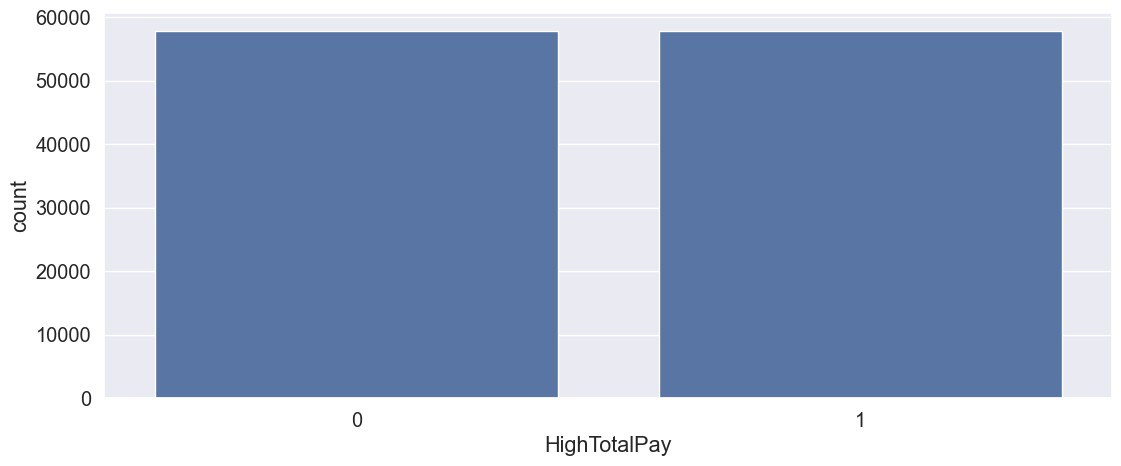

In [308]:
sns.countplot(x=df['HighTotalPay'])

In [309]:
## total pay distribution
fig = px.histogram(df, x='TotalPay',nbins=20, title='Distribution of TotalPay')
fig.show()

i noticed that most of the total pays benefits are in the range of (50K:90K) and very few are over 150K

In [310]:
## total pay benefits distribution
fig = px.histogram(df, x='TotalPayBenefits',nbins=20, title='Distribution of TotalPay Benefits')
fig.show()

i noticed that most of the total pays benefits are in the range of (70K:110K) and very few are over 200K

In [311]:
fig = px.histogram(df, x='compensation percentage',nbins=20, title='Distribution of compensation percentage')
fig.show()

this means that the basepay is more than 80% in most of the data

In [312]:
## average basepay by jobtitle
top_10_avg_basepay = df.groupby(['JobTitle'])['BasePay'].mean().reset_index().head(10).sort_values(by='BasePay',ascending=False)
fig1 = px.bar(top_10_avg_basepay, x='JobTitle', y='BasePay', title = 'Top 10 average Base pay By Job title')
fig1.show()


In [323]:
## avg total pay by year
totalpay_by_year = df.groupby(['Year'])['TotalPayBenefits'].mean().reset_index()
fig3 = px.line(totalpay_by_year, x='Year', y='TotalPayBenefits', title='Total pay with Benefits Each year')
fig3.show()

i noticed that the highest total pay benefits was in 2012

In [314]:
top_job_titles = (df.groupby(['JobTitle'])['Benefits'].mean().sort_values(ascending=False).head(10).index)
filtered_df = df[df['JobTitle'].isin(top_job_titles)]
px.box(filtered_df, x='JobTitle', y='Benefits', title= 'Benefits for top 10 Job titles')

In [315]:
## most 10 high paying jobs
top_10_paying_jobs = df.groupby(['JobTitle'])['TotalPayBenefits'].mean().sort_values(ascending=False).head(10).reset_index()
fig4 = px.bar(top_10_paying_jobs, x='JobTitle', y='TotalPayBenefits', title='Top 10 high paying jobs')
fig4.show()

In [316]:
## least 10 high paying jobs
least_10_paying_jobs = df.groupby(['JobTitle'])['TotalPayBenefits'].mean().sort_values(ascending=False).tail(10).reset_index()
fig4 = px.bar(least_10_paying_jobs, x='JobTitle', y='TotalPayBenefits', title='Least 10 paying jobs')
fig4.show()

In [317]:
## compensation percentage over years
compensation_percentage_by_year = df.groupby(['Year'])['compensation percentage'].mean().reset_index()
fig3 = px.line(compensation_percentage_by_year, x='Year', y='compensation percentage', title='compensation percentage Each year')
fig3.show()

base pay was the highest in 2013

In [318]:
## top 10 jobs in benefits
top_10_jobs_in_benefits = df.groupby(['JobTitle'])['Benefits'].mean().sort_values(ascending=False).head(10).reset_index()
fig4 = px.bar(top_10_jobs_in_benefits, x='JobTitle', y='Benefits', title='top 10 high paying jobs in Benefits')
fig4.show()

In [319]:
## top 10 jobs in overtimepay
top_10_jobs_in_OvertimePay = df.groupby(['JobTitle'])['OvertimePay'].mean().sort_values(ascending=False).head(10).reset_index()
fig4 = px.bar(top_10_jobs_in_OvertimePay, x='JobTitle', y='OvertimePay', title='top 10 high paying jobs in OvertimePay')
fig4.show()

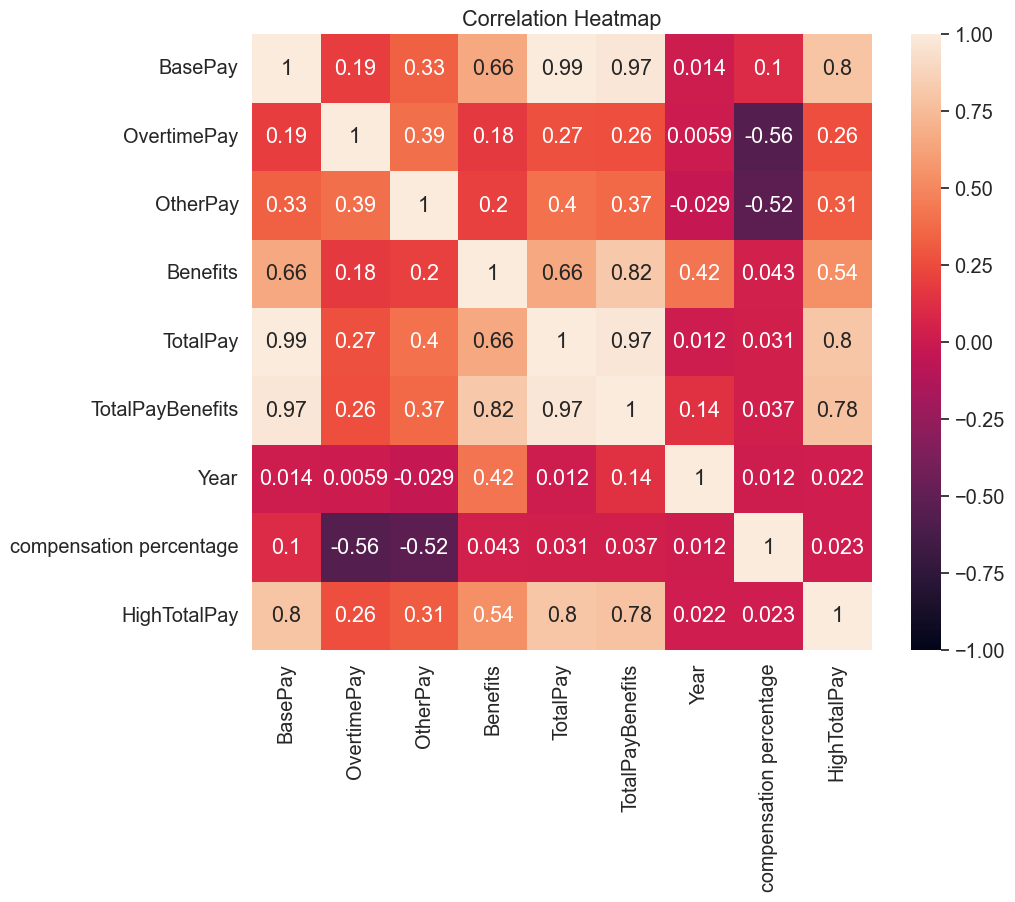

In [320]:
## hearmap to describe the relations between all columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [321]:
df

JobTitle    BasePay  OvertimePay  OtherPay  \
472            SENIOR PHYSICIAN SPECIALIST  176050.04         0.00  10481.51   
512            SENIOR PHYSICIAN SPECIALIST  175345.82         0.00  10017.33   
519                            MANAGER VII  176127.11         0.00   9085.02   
521                             MANAGER VI  180671.06         0.00   4500.00   
534     BATTALION CHIEF, (FIRE DEPARTMENT)  168713.20      5340.28  10122.78   
...                                    ...        ...          ...       ...   
143864                        Museum Guard   65007.45         0.00      0.00   
143865                         Sign Worker   65007.45         0.00      0.00   
143866        Stationary Eng, Sewage Plant   65007.45         0.00      0.00   
143867           Human Services Technician   65007.45         0.00      0.00   
143868         Communications Dispatcher 2   65007.45         0.00      0.00   

        Benefits   TotalPay  TotalPayBenefits  Year  compensation percentage  \
472          0.0  186531.55         186531.55  2011                94.380838   
512          0.0  185363.15         185363.15  2011                94.595835   
519          0.0  185212.13         185212.13  2011                95.094803   
521          0.0  185171.06         185171.06  2011                97.569815   
534          0.0  184176.26         184176.26  2011                91.604206   
...          ...        ...               ...   ...                      ...   
143864       0.0   65007.45          65007.45  2014               100.000000   
143865       0.0   65007.45          65007.45  2014               100.000000   
143866       0.0   65007.45          65007.45  2014               100.000000   
143867       0.0   65007.45          65007.45  2014               100.000000   
143868       0.0   65007.45          65007.45  2014               100.000000   

        HighTotalPay  
472                1  
512                1  
519                1  
521                1  
534                1  
...              ...  
143864             1  
143865             1  
143866             1  
143867             1  
143868             1  

[115491 rows x 10 columns]